<h1 style='color:blue' align='left'>Predicting Home Prices in Banglore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:blue'>Data Load: Load banglore home prices into a dataframe</h2>

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<h2 style='color:blue'>Drop Features</h2>

**Drop features that are not required to build our model**

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [9]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

In [14]:
df3.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h2 style='color:blue'>Add New Feature bhk</h2>

- Add new feature (integer) for bhk (Bedrooms Hall Kitchen)

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipykernel_8510/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [18]:
df3[df3.bhk > 20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

<h2 style='color:blue'>Explore total_sqft Feature</h2>

- Explore total_sqft feature

In [19]:
# First, we want to check the total_sqft is a unique number?
df3['total_sqft'].unique()
# We can see some range value ('1133 - 1384').

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head()

location   size   total_sqft  bath    price  bhk
30            Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122              Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165            Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188            KR Puram  2 BHK  1015 - 1540   2.0   56.800    2

In [22]:
df3[~df3['total_sqft'].apply(is_float)][5:10]

location       size      total_sqft  bath   price  bhk
410       Kengeri      1 BHK  34.46Sq. Meter   1.0   18.50    1
549   Hennur Road      2 BHK     1195 - 1440   2.0   63.77    2
648       Arekere  9 Bedroom       4125Perch   9.0  265.00    9
661     Yelahanka      2 BHK     1120 - 1145   2.0   48.13    2
672  Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.00    4

- Above shows that total_sqft can be a range (e.g. 2100-2850). 
- For such case we can just take average of min and max value in the range. 
- There are other cases, such as, 34.46 Sq. Meter. 
- We can convert meter to square ft using unit conversion.
- We are going to just drop such cases to keep things simple.

In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [24]:
convert_sqft_to_num('2166')

2166.0

In [25]:
convert_sqft_to_num('2000 - 4000')

3000.0

In [26]:
print(convert_sqft_to_num('2000sq. Meter'))

None


In [27]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4

- Check location 30 with range data ('2100-2850')
- For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [28]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [29]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [30]:
(2100+2850)/2

2475.0

<h2 style="color:blue">Feature Engineering</h2>

- Add new feature called price per square feet

In [31]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [32]:
print(len(df5.location))
print(len(df5.location.unique()))

13200
1298


In [33]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<h2 style="color:blue">Examine Categorical Variable</h2>

- Examine locations which is a categorical variable. 
- We need to apply dimensionality reduction technique here to reduce number of locations

In [34]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [35]:
df5.to_csv("bhp.csv",index=False)

In [36]:
location_stats.values.sum()

13200

In [37]:
len(location_stats[location_stats>10])

240

In [38]:
len(location_stats)

1287

In [39]:
len(location_stats[location_stats<=10])

1047

<h2 style="color:blue">Dimensionality Reduction</h2>

- Any location having less than 10 data points should be tagged as "other" location. 
- This way number of categories can be reduced by huge amount.
- Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [40]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [41]:
len(df5.location.unique())

1287

In [42]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [43]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

<h2 style="color:blue">Outlier</h2>

- Outlier are some errors in data.
- Sometimes, they are not data errors but extremely non-sense data even they are valid data.
- It make sense to remove them, otherwise, these outlier data create the model prediction problem. 

<h3 style="color:black">Remove Outlier by Domain Knowledge</h3>

- You are a data scientist and have a conversation with your business manager (who has expertise in real estate), 
- Business manager tell you: "Normally, minimum sq-ft of a bedroom is 300 sq-ft". 
- i.e., for 2 bedroom apartment, the total bedroom sq-ft is minimum 600 sqft (= 300 x 2 bhk).
- In the dataset, if you have 400 sq-ft apartment with 2 bedroom, we can bedroom size is 200 sq-ft (= 400/2)
- This bedroom size is less than normal size is a outlier (abnormal data).
- We do not keep abnormal data in the dataset. We remove these outliers in the dataset.

In [44]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

- Check the above data points. 
- We have 6 bedrooms apartment with 1020 sqft. 
- Another one is 8 bedroom and total sqft is 600. 
- These are clear data errors and should be removed.

In [45]:
df5.shape

(13200, 7)

In [46]:
len(df5[df5.total_sqft/df5.bhk<300])

744

In [47]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

<h3 style='color:black'>Keep Data between (Mean +/- std )</h3>

In [48]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

- Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000.
- This shows a wide variation in property prices. 
- We should remove outliers per location using mean and one standard deviation

In [104]:
def remove_pps_outliers(df):
    #print(df.head())
    #    location                  size   total_sqft  bath price  bhk  price_per_sqft   
    # 0  Electronic City Phase II  2 BHK  1056.0      2.0  39.07  2    3699.810606
    #print(len(df.groupby('location')) 
    # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7d079bff7c40>
    df_out = pd.DataFrame()
    # print (df_out)
    # Empty DataFrame
    # Columns: []
    # Index: []
    for key, subdf in df.groupby('location'):
        #print (key)    # 1st Block Jayanagar
        # print (subdf.head())
        #     location             size   total_sqft  bath  price  bhk  price_per_sqft 
        # 210 1st Block Jayanagar  4 BHK  2850.0      4.0   428.0  4    15017.543860            
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #print (reduced_df.head())
        #     location             size   total_sqft  bath  price  bhk  price_per_sqft  
        # 210 1st Block Jayanagar  4 BHK  2850.0      4.0   428.0  4    15017.543860  
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        #print (df_out.head())
        #   location             size   total_sqft  bath  price  bhk  price_per_sqft
        #0  1st Block Jayanagar  4 BHK  2850.0      4.0   428.0  4    15017.543860
    return df_out
print('df6.shape:', df6.shape)
df7 = remove_pps_outliers(df6)
print('df7.shape:', df7.shape)

df6.shape: (12456, 7)
df7.shape: (10242, 7)


<h3 style='color:black'>Plot Bedroom Size vs. Price</h3>

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

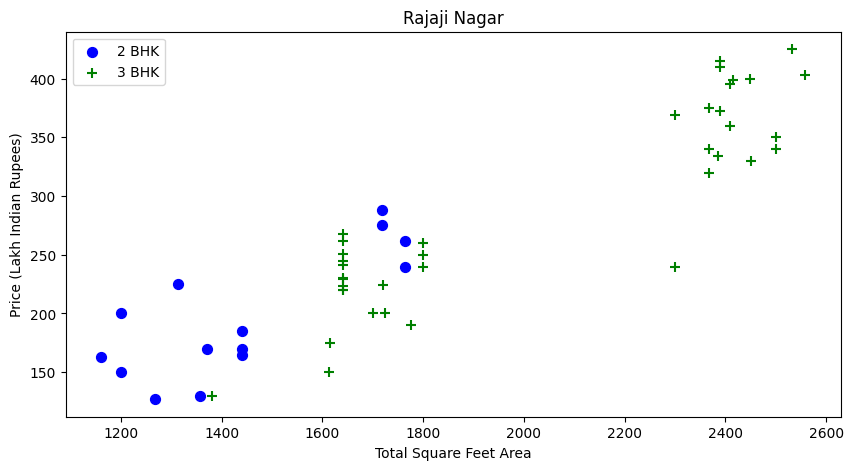

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

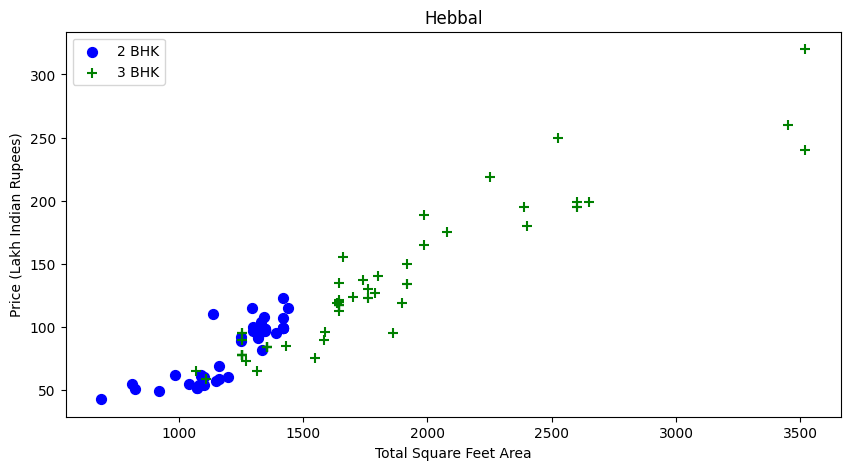

In [51]:
plot_scatter_chart(df7,"Hebbal")

<h3 style='color:black'>Remove More Bedroom/sq-ft but Less Price</h3>

- Remove more bedroom with less price than average same bedroom price
- Remove bigger sq-ft with less price than average same sq-ft price
- Build Dictiornay Format

- We should also remove properties 
- Where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment 
- (with same square ft area). 
- For a given location, we will build a dictionary of stats per bhk, i.e.,

```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```

- Now, we remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [111]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
print('df7.shape:', df7.shape)
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
print('df8.shape:', df8.shape)

df7.shape: (10242, 7)
df8.shape: (7317, 7)


<h3 style='color:black'>Plot Bedroom vs Price</h3>

- Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

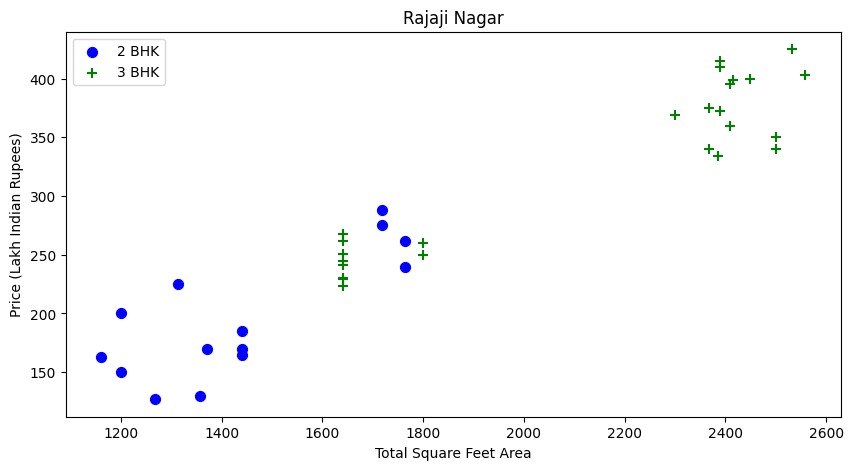

In [53]:
plot_scatter_chart(df8,"Rajaji Nagar")

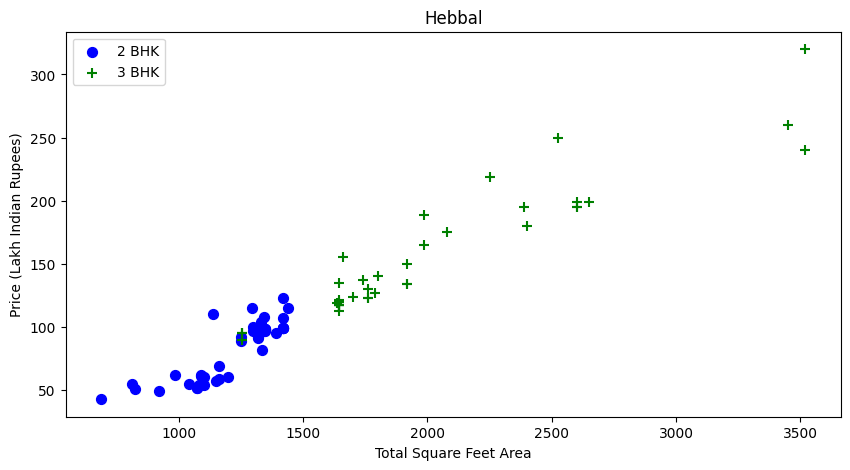

In [54]:
plot_scatter_chart(df8,"Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

<h3 style='color:green'>Before and after outlier removal: Rajaji Nagar</h3>

<img src="rajaji_nagar_outliers.png"></img>

<h3 style='color:green'>Before and after outlier removal: Hebbal</h3>

<img src="hebbal_outliers.png"></img>

Text(0, 0.5, 'Count')

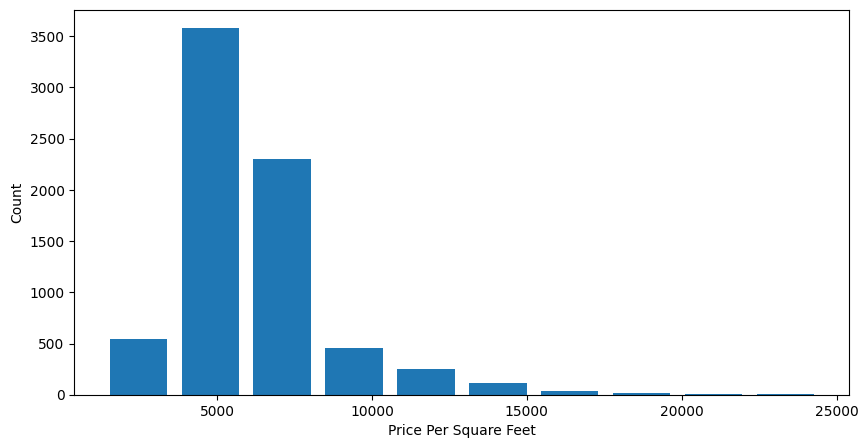

In [113]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h3 style='color:blue'>Outlier Removal Using Bathrooms Feature</h3>

In [56]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

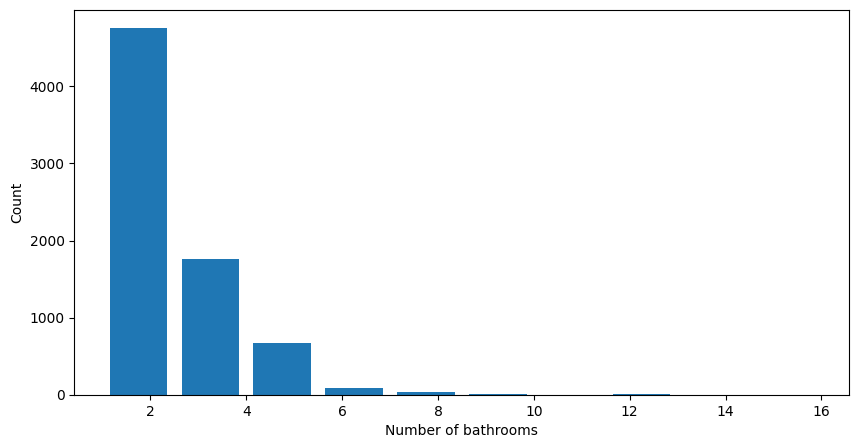

In [114]:
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

<h3 style='color:blue'>Remove Bathroom > Bedroom + 2</h3>

- Check bathroom > 10.

In [58]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8483           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8572           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9306           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9637           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

- It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [59]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

- The business manager has a conversation with you (i.e., a data scientist)
- If you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, 
- you will have total bath = total bed + 1 max. 
- Anything above that is an outlier or a data error and can be removed

In [60]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [61]:
df9.head(2)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491

<h3 style='color:blue'>Cleanup Final Dataset</h3>

In [115]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3